In [1]:
import os, sys
import pandas as pd
dev_path = os.path.abspath('')
src_path = os.path.join(dev_path, "..", 'src')
sys.path.append(src_path)
from scipy.interpolate import RegularGridInterpolator

In [2]:
import stormTracks.STtoolbox as sttb
import swissMetNet.SMNtoolbox as smntb
import pwOutputs.PWtoolbox as pwtb
import linReg.Statistics as lrstat

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns

In [4]:
ds = lrstat.loadData(fromFile = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/alecler1/treated_data/SwissMetNet/2016/SMN_PW_2016_04.nc")

storms = sttb.loadStorms("/work/FAC/FGSE/IDYST/tbeucler/downscaling/alecler1/treated_data/Storm_tracks/CH_severe_storms_2016_2021_WGS84.pkl")
storms["time"] = storms["time"].dt.tz_localize(None)
storms = sttb.filter(storms, maxdate = pd.Timestamp("2016-12-01 00:00:00"))
storms

stormsDateID = sttb.loadStorms("/work/FAC/FGSE/IDYST/tbeucler/downscaling/alecler1/treated_data/Storm_tracks/CH_severe_storms_2016_2021_date_id.pkl")
stormsDateID.index = stormsDateID.index.tz_localize(None)
stormsDateID.sort_index(inplace=True)
stormsDateID = stormsDateID.loc[:pd.Timestamp("2016-12-01 00:00:00")]

times = ds.time.values
stations = ds.station.values

nearest_storm = np.array([[""]*len(stations)]*len(times), dtype=object)
distance = np.array([[np.inf]*len(stations)]*len(times))

for i in range(len(times)):
    print(f"{i/len(times)*100:.2f} %", end='\r')
    lon,lat = ds.sel(time=times[i]).longitude.values, ds.sel(time=times[i]).latitude.values
    ids, dist = sttb.nearestStorm(storms, stormsDateID, lon,lat,times[i])
    nearest_storm[i] = ids
    distance[i] = dist
        

In [5]:
ds["nearest_storm"] = xr.DataArray(nearest_storm, coords=[ds.time, ds.station], dims=["time", "station"])

In [6]:
ds["distance"] = xr.DataArray(distance, coords=[ds.time, ds.station], dims=["time", "station"])

In [7]:
for i in distance:
    print(i)

[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf]
[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf 

In [8]:
ds

<xarray.Dataset> Size: 14GB
Dimensions:               (isobaricInhPa: 13, lead_time: 33, time: 5136,
                           station: 152)
Coordinates:
  * isobaricInhPa         (isobaricInhPa) int64 104B 50 100 150 ... 850 925 1000
  * lead_time             (lead_time) int64 264B 0 1 2 3 4 5 ... 36 42 48 60 72
    lon                   (time, station) float64 6MB ...
    lat                   (time, station) float64 6MB ...
  * time                  (time) datetime64[ns] 41kB 2016-04-01 ... 2016-10-3...
  * station               (station) object 1kB 'ABO' 'AIG' 'ALT' ... 'WYN' 'ZER'
    latitude              (time, station) float64 6MB ...
    longitude             (time, station) float64 6MB ...
Data variables: (12/13)
    msl                   (lead_time, time, station) float64 206MB ...
    u10                   (lead_time, time, station) float64 206MB ...
    v10                   (lead_time, time, station) float64 206MB ...
    t2m                   (lead_time, time, station) float64 206MB ...
    z                     (lead_time, time, isobaricInhPa, station) float64 3GB ...
    q                     (lead_time, time, isobaricInhPa, station) float64 3GB ...
    ...                    ...
    u                     (lead_time, time, isobaricInhPa, station) float64 3GB ...
    v                     (lead_time, time, isobaricInhPa, station) float64 3GB ...
    precipitation_amount  (time, station) float64 6MB ...
    wind_speed_of_gust    (time, station) float64 6MB ...
    nearest_storm         (time, station) object 6MB None None ... None None
    distance              (time, station) float64 6MB inf inf inf ... inf inf

In [11]:
dsaugust = ds.sel(time=slice("2016-08-01", "2016-08-31"))

In [12]:
dsaugust

<xarray.Dataset> Size: 2GB
Dimensions:               (isobaricInhPa: 13, lead_time: 33, time: 744,
                           station: 152)
Coordinates:
  * isobaricInhPa         (isobaricInhPa) int64 104B 50 100 150 ... 850 925 1000
  * lead_time             (lead_time) int64 264B 0 1 2 3 4 5 ... 36 42 48 60 72
    lon                   (time, station) float64 905kB ...
    lat                   (time, station) float64 905kB ...
  * time                  (time) datetime64[ns] 6kB 2016-08-01 ... 2016-08-31...
  * station               (station) object 1kB 'ABO' 'AIG' 'ALT' ... 'WYN' 'ZER'
    latitude              (time, station) float64 905kB ...
    longitude             (time, station) float64 905kB ...
Data variables: (12/13)
    msl                   (lead_time, time, station) float64 30MB ...
    u10                   (lead_time, time, station) float64 30MB ...
    v10                   (lead_time, time, station) float64 30MB ...
    t2m                   (lead_time, time, station) float64 30MB ...
    z                     (lead_time, time, isobaricInhPa, station) float64 388MB ...
    q                     (lead_time, time, isobaricInhPa, station) float64 388MB ...
    ...                    ...
    u                     (lead_time, time, isobaricInhPa, station) float64 388MB ...
    v                     (lead_time, time, isobaricInhPa, station) float64 388MB ...
    precipitation_amount  (time, station) float64 905kB ...
    wind_speed_of_gust    (time, station) float64 905kB ...
    nearest_storm         (time, station) object 905kB None ... '201608312005...
    distance              (time, station) float64 905kB inf inf ... 4.359 8.3

In [13]:
dsaugust.where(dsaugust.distance<10, drop=True)

<xarray.Dataset> Size: 549MB
Dimensions:               (lead_time: 33, time: 199, station: 151,
                           isobaricInhPa: 13)
Coordinates:
  * isobaricInhPa         (isobaricInhPa) int64 104B 50 100 150 ... 850 925 1000
  * lead_time             (lead_time) int64 264B 0 1 2 3 4 5 ... 36 42 48 60 72
    lon                   (time, station) float64 240kB 7.561 6.924 ... 7.752
    lat                   (time, station) float64 240kB 46.49 46.33 ... 46.03
  * time                  (time) datetime64[ns] 2kB 2016-08-01T13:00:00 ... 2...
  * station               (station) object 1kB 'ABO' 'AIG' 'ALT' ... 'WYN' 'ZER'
    latitude              (time, station) float64 240kB 46.49 46.33 ... 46.03
    longitude             (time, station) float64 240kB 7.561 6.924 ... 7.752
Data variables: (12/13)
    msl                   (lead_time, time, station) float64 8MB nan ... 1.01...
    u10                   (lead_time, time, station) float64 8MB nan ... 7.053
    v10                   (lead_time, time, station) float64 8MB nan ... 7.033
    t2m                   (lead_time, time, station) float64 8MB nan ... 275.5
    z                     (lead_time, time, isobaricInhPa, station) float64 103MB ...
    q                     (lead_time, time, isobaricInhPa, station) float64 103MB ...
    ...                    ...
    u                     (lead_time, time, isobaricInhPa, station) float64 103MB ...
    v                     (lead_time, time, isobaricInhPa, station) float64 103MB ...
    precipitation_amount  (time, station) float64 240kB nan nan nan ... 0.0 0.0
    wind_speed_of_gust    (time, station) float64 240kB nan nan nan ... 1.1 0.9
    nearest_storm         (time, station) object 240kB nan ... '2016083120050...
    distance              (time, station) float64 240kB nan nan ... 4.359 8.3

In [43]:
wg1 = xr.DataArray(data = (dsaugust.wind_speed_of_gust / dsaugust.distance).sum(dim = "station") / (1/dsaugust.distance).sum(dim = "station"),
                   coords = [dsaugust.time],
                   dims = ["time"],
                   name = "linear_weighted_wind_speed_of_gust")

wg2 = xr.DataArray(data = (dsaugust.wind_speed_of_gust / dsaugust.distance**2).sum(dim = "station") / (1/dsaugust.distance**2).sum(dim = "station"),
                   coords = [dsaugust.time],
                   dims = ["time"],
                   name = "square_weighted_wind_speed_of_gust")

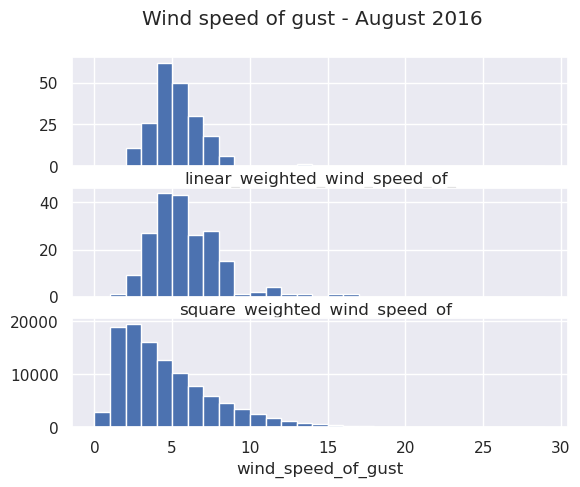

In [48]:
fig, ax = plt.subplots(nrows = 3, sharex = True)
sns.set_theme()
wg1.plot.hist(bins = np.arange(0, 30, 1), ax = ax[0])
wg2.plot.hist(bins = np.arange(0, 30, 1), ax = ax[1])
dsaugust.wind_speed_of_gust.plot.hist(bins = np.arange(0, 30, 1), ax = ax[2])
plt.suptitle("Wind speed of gust - August 2016")
plt.show()

(array([2.8420e+03, 1.8999e+04, 1.9611e+04, 1.6028e+04, 1.2643e+04,
        1.0281e+04, 7.7020e+03, 5.8730e+03, 4.4740e+03, 3.3460e+03,
        2.4660e+03, 1.6700e+03, 1.1910e+03, 7.1600e+02, 4.8400e+02,
        3.3200e+02, 2.2300e+02, 1.6400e+02, 7.9000e+01, 6.2000e+01,
        3.1000e+01, 2.0000e+01, 2.0000e+01, 6.0000e+00, 6.0000e+00,
        5.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29.]),
 <BarContainer object of 29 artists>)

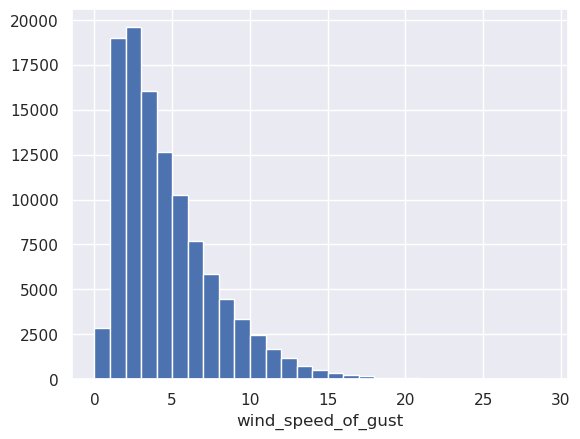

In [50]:
pd.Timestamp("2016-8-01 00:00:00")

Timestamp('2016-08-01 00:00:00')